# Emotion Detection

Megin van Herk

In [46]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
pip install neattext

In [4]:
import neattext.functions as nfx

In [5]:
df = pd.read_csv("Emotions.csv")
df.drop(df[df['Emotion']=='shame'].index, inplace=True)
df.drop(df[df['Emotion']=='disgust'].index, inplace=True)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

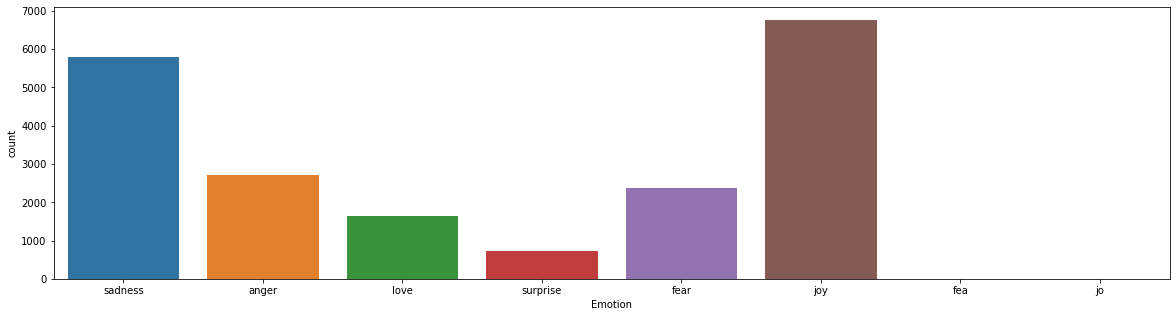

In [6]:
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df)

In [7]:
df2 = pd.read_csv("tweet_emotions.csv")

In [8]:
df2.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [9]:
df['Emotion'].value_counts()
df2.rename(columns = {'sentiment':'Emotion', 'content':'Text'}, inplace = True)
df2.tail()

,tweet_id,Emotion,Text
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


<AxesSubplot:xlabel='Emotion', ylabel='count'>

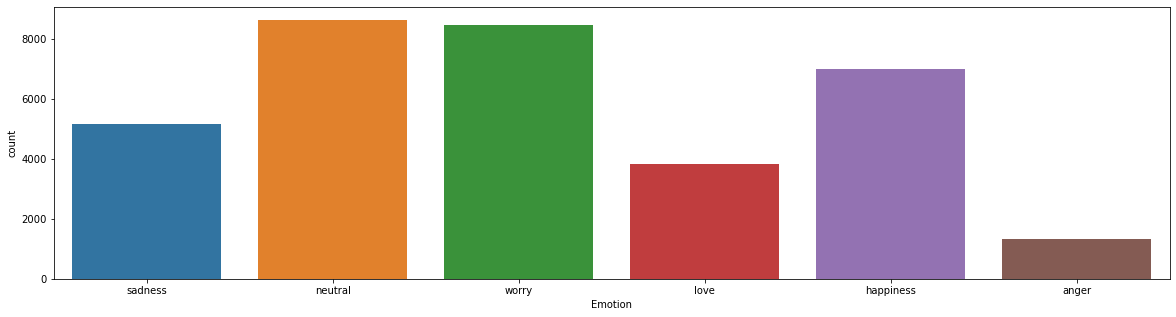

In [10]:
df2.drop(['tweet_id'],axis=1, inplace=True)
df2.drop(df2[df2['Emotion']=='empty'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='enthusiam'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='boredom'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='relief'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='anger'].index, inplace=True)
pre = {'neutral':'neutral','sadness':'sadness','worry':'worry','love':'love','happiness':'happiness','fun':'happiness','suprise':'suprise','hate':'anger'}
df2['Emotion'] = df2['Emotion'].map(pre)
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df2)

20000 i didnt feel humiliated


<AxesSubplot:xlabel='Emotion', ylabel='count'>

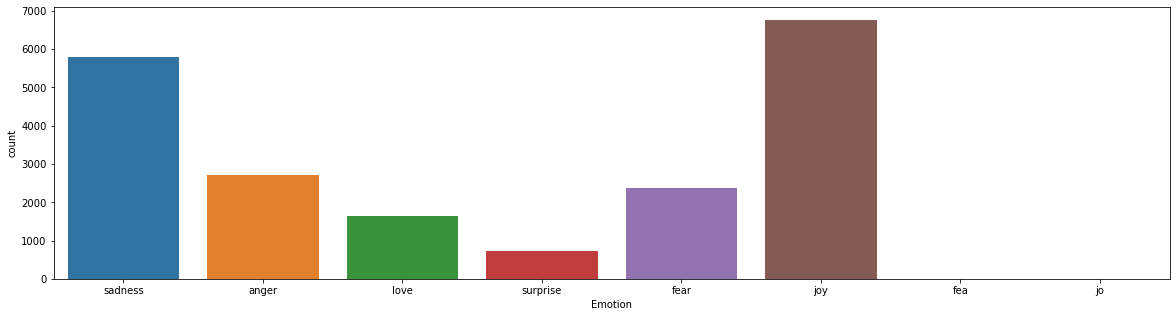

In [11]:
import fileinput
  
# Using fileinput.input() method
a = []
b = []
for line in fileinput.input(files ='train.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])
for line in fileinput.input(files ='test.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])
for line in fileinput.input(files ='val.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])

print(len(b),a[0])
dic = {'Text':a, 'Emotion':b}
df3 = pd.DataFrame(dic)
df3.to_csv('Emotions.csv') 
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df3)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

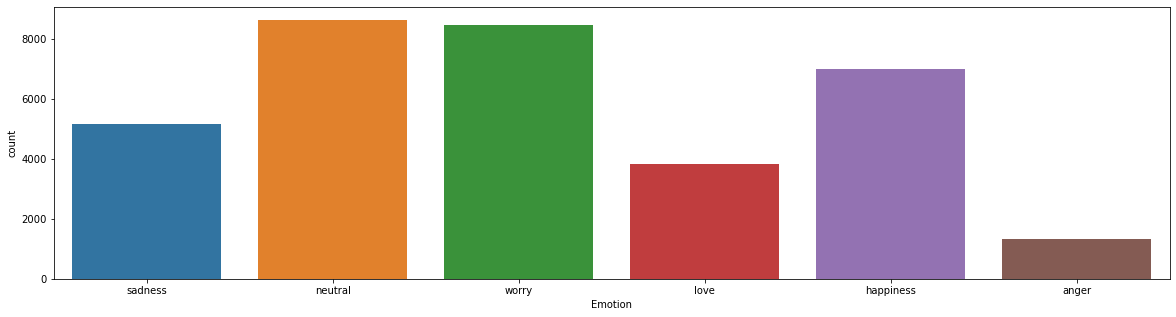

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df2)

In [16]:
df_concat = pd.concat([df,df2,df3], axis=0)
df_concat.head()
labels = {}
j = 0
for i in df_concat['Emotion'].unique():
    labels[i] = j
    j += 1
print(labels)
print(df_concat.head())
df_concat.drop(df_concat[df_concat['Emotion']=='happiness'].index, inplace=True)

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5, 'fea': 6, 'jo': 7, nan: 8, 'neutral': 9, 'worry': 10, 'happiness': 11}
   Unnamed: 0                                               Text  Emotion
0         0.0                            i didnt feel humiliated  sadness
1         1.0  i can go from feeling so hopeless to so damned...  sadness
2         2.0   im grabbing a minute to post i feel greedy wrong    anger
3         3.0  i am ever feeling nostalgic about the fireplac...     love
4         4.0                               i am feeling grouchy    anger


<AxesSubplot:xlabel='Emotion', ylabel='count'>

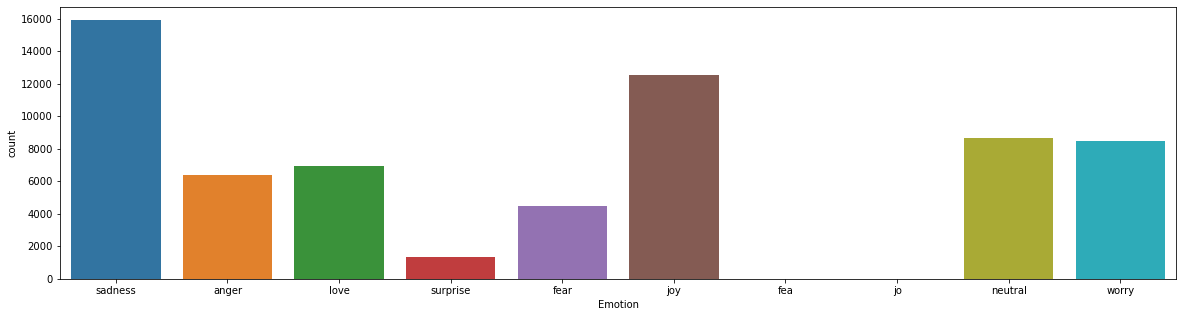

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df_concat)

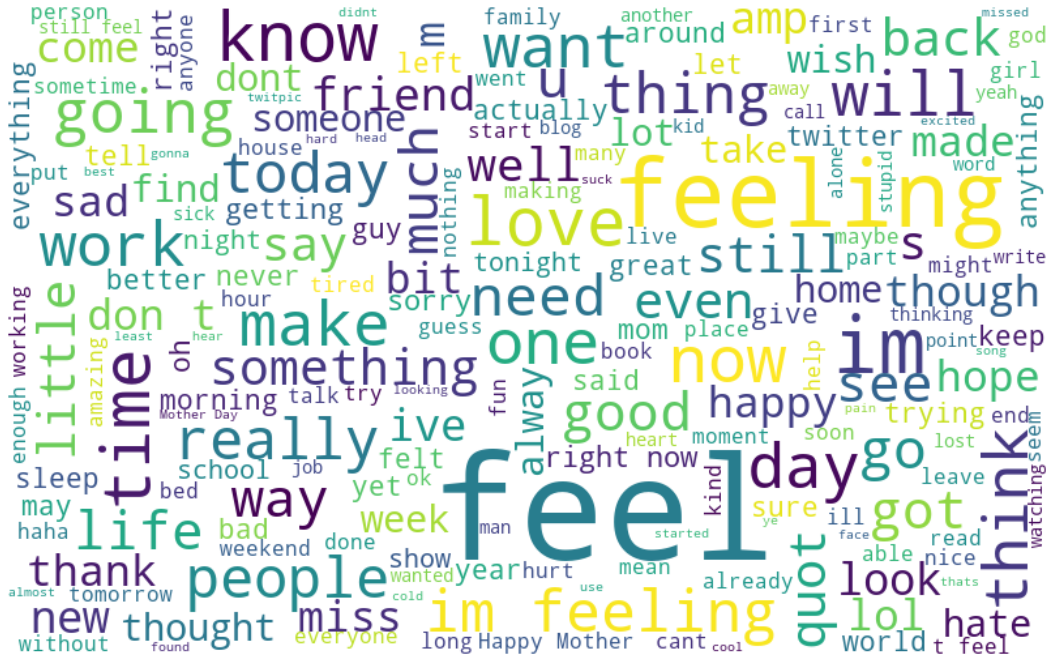

In [45]:
all_words = ' '.join([text for text in  df_concat['Text']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words) 
plt.figure(figsize=(20, 12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [19]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df_concat['Clean_Text'] = df_concat['Text'].apply(nfx.remove_userhandles)

In [21]:
df_concat['Clean_Text'] = df_concat['Clean_Text'].apply(nfx.remove_stopwords)
df_concat['Emotion'] = df_concat['Emotion'].map(labels)

In [22]:
df_concat = df_concat.sample(frac = 1)
df_concat

,Unnamed: 0,Text,Emotion,Clean_Text
12967,NaN,i feel like it may have been a missed opportun...,0,feel like missed opportunity
13230,NaN,Anyone want to stop by Carl's Jr and bring me ...,10,want stop Carl's Jr bring chicken club? barely...
11926,NaN,@savvybride That's no good. I'm sorry,10,That's good. I'm sorry
12393,12393.0,i wont feel so damn idiotic,0,wont feel damn idiotic
15930,NaN,im feeling ok other than the raging hormones,5,im feeling ok raging hormones
...,...,...,...,...
17138,NaN,@tracecyrus plz dont fall in love with tokyo a...,8,plz dont fall love tokyo come home
17600,17600.0,i sit up and i feel awful about it as miles st...,0,sit feel awful miles starts feeling pants ciga...
4974,NaN,ive always been a giver not a taker i feel sel...,1,ive giver taker feel selfish considering idea
3170,NaN,i am feeling so festive right now and not just...,5,feeling festive right lovely wintry scene walk...


In [23]:
df_concat = df_concat.sample(frac = 1)
Xfeatures = df_concat['Clean_Text']
ylabels = df_concat['Emotion']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=100)

In [25]:
ex1 = "I am sad and angry"

In [26]:
pipe_dt = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(random_state=100))])

In [27]:
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [28]:
pipe_dt.score(x_test,y_test)

0.6868948185379555

In [29]:
a = pipe_dt.predict([ex1])
label = {}
for i,j in labels.items():
    label[j] = i
label[int(a)]

'sadness'

In [30]:
# pipe_rf = Pipeline([('vect', CountVectorizer()),
#                    ('tfidf', TfidfTransformer()),
#             ('clf', RandomForestClassifier(n_estimators = 200, random_state=100))])

In [31]:
# pipe_rf.fit(x_train,y_train)

In [32]:
# pipe_rf.score(x_test,y_test)

In [33]:
# label[int(pipe_rf.predict([ex1]))]


In [34]:
from xgboost import XGBClassifier
pipe_xg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', XGBClassifier(n_estimators=300,random_state=100))])

In [35]:
pipe_xg.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=300, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predict

In [36]:
pipe_xg.score(x_test,y_test)

0.7075171853056398

In [42]:
label[int(pipe_xg.predict(['love you']))]

'love'

In [44]:
label[int(pipe_xg.predict(['i hate everything']))]

'anger'

In [47]:
label[int(pipe_dt.predict(['i hate everything']))]

'anger'

In [57]:
import ipywidgets as widgets

def on_button_clicked(b):
    response = label[int(pipe_dt.predict([w_text.value]))]
    w_output.clear_output()
    with w_output:
        print(response)

w_header = widgets.HTML('<h2><i>Emotion</i> <b>detection</b></h2>')
w_text = widgets.Textarea(placeholder='Write something!', layout=widgets.Layout(width = '80%'))
w_button = widgets.Button(description='Find emotion')
w_button.on_click(on_button_clicked)
w_output = widgets.Output()
w_ui = widgets.VBox([w_header, w_text, w_button, w_output], layout=widgets.Layout(align_items='center'))
display(w_ui)